# Project 6 in Pycaret v2.3.6

Notes:
    
    

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Some EDA

In [2]:
df= pd.read_csv("AQI Data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       1093 non-null   float64
 1   TM      1093 non-null   float64
 2   Tm      1093 non-null   float64
 3   SLP     1093 non-null   float64
 4   H       1093 non-null   float64
 5   VV      1093 non-null   float64
 6   V       1093 non-null   float64
 7   VM      1093 non-null   float64
 8   PM 2.5  1092 non-null   float64
dtypes: float64(9)
memory usage: 77.0 KB


In [4]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


### Let us understand what these abbreviations stand for :

- T	 = Average annual temperature
- TM = Annual average maximum temperature
- Tm = Average annual minimum temperature
- SLP = Sea Level Pressure
- H = Humidity
- V	= Annual average wind speed
- VM = Maximum wind speed
- PM 5 : This is our Dependent variable i.e. our Air Quality Index

<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


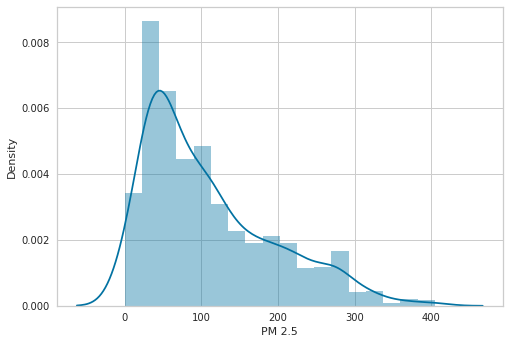

In [7]:
sns.distplot(df['PM 2.5'])

## Pycaret

In [12]:
# init setup
from pycaret.regression import *
s = setup(df, target = 'PM 2.5', session_id = 123)

,Description,Value
0,session_id,123
1,Target,PM 2.5
2,Original Data,"(1093, 9)"
3,Missing Values,True
4,Numeric Features,8
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(765, 8)"


In [13]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,19.2954,1239.1182,34.7441,0.8180,0.6770,0.4016,0.0870
catboost,CatBoost Regressor,24.2611,1452.8700,37.5350,0.7862,0.7667,0.5404,0.8210
rf,Random Forest Regressor,25.2236,1492.5435,37.9655,0.7822,0.7792,0.5370,0.1190
xgboost,Extreme Gradient Boosting,22.0817,1582.1611,38.8512,0.7715,0.7038,0.3926,6.0710
lightgbm,Light Gradient Boosting Machine,26.6300,1589.2830,39.1256,0.7665,0.7735,0.5280,0.0560
gbr,Gradient Boosting Regressor,31.6331,2050.7643,44.6721,0.6995,0.8850,0.8009,0.0300
dt,Decision Tree Regressor,27.8688,2622.1719,50.5279,0.6014,0.9208,0.5126,0.0060
ada,AdaBoost Regressor,41.8753,2722.9740,52.0527,0.5894,1.0181,1.1071,0.0270
lasso,Lasso Regression,43.4604,3448.4752,58.4002,0.4879,1.0285,1.1925,0.0060
lar,Least Angle Regression,43.5047,3457.6538,58.4772,0.4856,1.0333,1.1949,0.0050


Best scores from XGBoost from the original course notebook are:
    R2 = 0.81789
    MAE = 18.649655
    MSE = 1309.619991
    RMSE = 36.1886721
    

In [15]:
et = create_model('et')

In [16]:
tuned_et = tune_model(et)

In [17]:
tuned_et2 = tune_model(et, search_library='optuna', n_iter=20)

In [21]:
tuned_et2 = tune_model(et, search_library='optuna', n_iter=50, early_stopping=True)

## Blend Models

In [18]:
# train individual models to blend
catboost = create_model('catboost', verbose = False)
et = create_model('et', verbose = False)
rf = create_model('rf', verbose = False)

In [20]:
blend_soft = blend_models(estimator_list = [catboost, et, rf])

/home/bk/anaconda3/envs/pycaret236/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/bk/anaconda3/envs/pycaret236/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/bk/anaconda3/envs/pycaret236/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/bk/anaconda3/envs/pycaret236/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/bk/anaconda3/envs/

## Stack Models

In [ ]:
tuned_et2 = tune_model(et, search_library='optuna', n_iter=20)

In [22]:
top3 = compare_models(n_select = 3)
stacker = stack_models(top3)

## Interpret Model

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


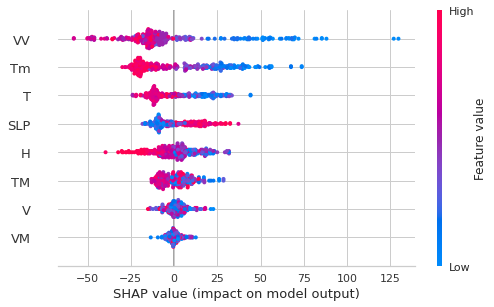

In [24]:
interpret_model(et)

In [25]:
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Create API

In [28]:
from pycaret.regression import *
# create api
create_api(et, 'et_api')


API sucessfully created. This function only creates a POST API, it doesn't run it automatically.

To run your API, please run this command --> !python et_api.py
    


In [30]:
# run apiSS
!python et_api.py

Traceback (most recent call last):
  File "et_api.py", line 3, in <module>
    from pycaret.regression import load_model, predict_model
ModuleNotFoundError: No module named 'pycaret'
